# Trees in Camden Data Quality Report


# Data Quality Report Contents

Contents 

Task 2: Load Data and Perform Initial Exploration - 
Camden trees, the Environmental and Common names datasets, as well as displaying the first few rows, getting the number of rows, listing all columns, listing the data types for each column. The same operations have been performed on the environmental and commen names sets.

Task 3: Further Inspecting of the Datasets - 
Creaiting list of values throuhg value.count for all string columns in the trees data set, then got the descriptive statistics for the set, and listing its data types. Then found out if floats are really floats or ints with nulls. Same operations have been performed on the environmental data set. Only unique values have been counted for the common names data set, due to no numeric values in it.

Task 4: Identify Missing Values -
This task consists mainly of performing mathematical operations to find missing values in all three data sets.

Task 5:  Identify Outliers in the Trees Dimensions -
Here, the main objective in this task is to find the crazy outliers for Height, Spread and Diametre for the trees, and then displaying the crazy outliers.

Task 6: Identify Duplicates in the Trees Dataset - 
The main objective of this task was to find out, if there wre any duplicated rows based on the identifier column.

Task7: Identify Geolocation Issues - 
The main objective in this task was to find the outside trees and tthen displayed them in the scatter plot and generated data frame.

Task 8: Identify Unmatched Data - the main objective of this task is to identify unmatched data for all three data frames. 


# Task 1: Document the Data Sources

The data source list document has been filled accordingly as per the requirements of the project

## Imports
Importing  the libraries we need to perform the analysis. These include Pandas, NumPy, SciPy.stats, MatPlotLib, and Seaborn. 

In [2]:
import matplotlib.pyplot as mplt
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns
from scipy.stats import zscore

## Task 2: Load Data and Perform Initial Exploration
Loaded the data from the supplied data files.  The files are in different **file formats(xlsx, csv, json, etc.)**, but Pandas has no problem processing them. They are read the data in using the appropriate function:

- [pandas.read_excel](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html)
- [pandas.read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)
- [pandas.read_json](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.read_json.html)


The first loading has been done, one (loading `"camden_trees.xlsx"`) for you.  Please load `"camden_trees_environmental.csv"` and `"tree_common_names.json"` and analyse them in the same way.


### 2.1 Trees
The file `"camden_trees.xlsx"` is an Excel file, so the 'read_excel()' function is used in order to read and created the data frame. The name of this data frame is trees.

In [3]:
# Creating a Pandas dataframe called trees that contains the contents of the Excel file through pd.read function
trees = pd.read_excel("camden_trees.xlsx")
print(trees)

      Identifier  Number Of Trees                         Site Name  \
0       00060053              1.0          Russell Nurseries Estate   
1       00057855              1.0                 BRECKNOCK JMI (E)   
2       00059953              1.0        Estate 51 Ravenshaw Street   
3       00059915              1.0                 ROSARY RC JMI (E)   
4       00010762              1.0                Holly Lodge Estate   
...          ...              ...                               ...   
23439   00057455              1.0  KILBURN GRANGE, MESSINA AVE (LS)   
23440   00015494              1.0                  OSSULSTON STREET   
23441   00001693              1.0                    BELMONT STREET   
23442   00020342              1.0              Templar House Estate   
23443   00013369              1.0                    LYNDHURST ROAD   

      Contract Area          Scientific Name Inspection Date  \
0           Housing          Vacant Tree Pit             NaT   
1         Education

Here the first few rows are inspected using 'head()'.  By default, 'head()' displays the first 5 rows.

In [4]:
# Displaying the first few rows using .head() function, for more insights on the data frame.
trees.head()

,Identifier,Number Of Trees,Site Name,Contract Area,Scientific Name,Inspection Date,Inspection Due Date,Height In Metres,Spread In Metres,Diameter In Centimetres At Breast Height,Ward Code,Ward Name,Easting,Northing,Longitude,Latitude,Location
0,00060053,1.0,Russell Nurseries Estate,Housing,Vacant Tree Pit,NaT,NaN,NaN,NaN,NaN,E05000135,Hampstead Town,527305.0,185240.0,-0.165240,51.551693,"(51.551693, -0.16524)"
1,00057855,1.0,BRECKNOCK JMI (E),Education,Vacant Tree Pit,2019-07-17,2022/2023,NaN,NaN,NaN,E05000131,Cantelowes,529923.0,184782.0,-0.127681,51.546984,"(51.546984, -0.127681)"
2,00059953,1.0,Estate 51 Ravenshaw Street,Housing,Ficus carica,NaT,NaN,5.0,4.0,10.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN
3,00059915,1.0,ROSARY RC JMI (E),Education,Betula jacquemontii,NaT,NaN,4.0,1.0,6.0,E05000135,Hampstead Town,527249.0,185261.0,-0.166051,51.551901,"(51.551901, -0.166051)"
4,00010762,1.0,Holly Lodge Estate,Housing,Ilex x altaclarensis,2017-06-14,2020/2021,14.0,6.0,26.0,E05000137,Highgate,528414.0,186770.0,-0.148704,51.565198,"(51.565198, -0.148704)"


It's good to get an idea of the size of the dataset we are dealing with.  So, the 'shape' method does this for us.

In [5]:
# Getting the number of rows and columns using pandas .shape method to get how many rows and columns are there in the data set
trees.shape

(23444, 17)

The columns method can be used to display the complete list of column names.

In [6]:
# Listing all the columns in the dataframe using .column method for completeness
trees.columns

Index(['Identifier', 'Number Of Trees', 'Site Name', 'Contract Area',
       'Scientific Name', 'Inspection Date', 'Inspection Due Date',
       'Height In Metres', 'Spread In Metres',
       'Diameter In Centimetres At Breast Height', 'Ward Code', 'Ward Name',
       'Easting', 'Northing', 'Longitude', 'Latitude', 'Location'],
      dtype='object')

In [7]:
# Listing the data types of each column through the .dtypes method  for more clarity
trees.dtypes

Identifier                                          object
Number Of Trees                                    float64
Site Name                                           object
Contract Area                                       object
Scientific Name                                     object
Inspection Date                             datetime64[ns]
Inspection Due Date                                 object
Height In Metres                                   float64
Spread In Metres                                   float64
Diameter In Centimetres At Breast Height           float64
Ward Code                                           object
Ward Name                                           object
Easting                                            float64
Northing                                           float64
Longitude                                          float64
Latitude                                           float64
Location                                            obje

Notice outliers, list columns in the trees dataframe for completeness.

Notice the null values which will be dealt with subsequently.

### 2.2 Environmental
The file `"camden_trees_environmental.csv"` is a csv file.  Using the appropriate function to load it into a Pandas Data Frame, and perform the necissary operation, as done in the previous two data sets.

### Creating a Pandas dataframe called trees_e that contains the contents of the csv file
# TODO


In [8]:
trees_e = pd.read_csv("camden_trees_environmental.csv")
print(trees_e)

      Identifier     Maturity Physiological Condition Tree Set To Be Removed  \
0       00055125     Juvenile                    Good                     No   
1       00059429  Middle aged                    Fair                     No   
2       00018254       Mature                    Fair                     No   
3       00027155       Mature                    Fair                     No   
4       00041326     Juvenile                    Good                     No   
...          ...          ...                     ...                    ...   
23410   00007869       Mature                    Fair                     No   
23411   00002691       Mature                    Good                     No   
23412   00005801       Mature                    Fair                     No   
23413   00007948  Middle aged                    Fair                     No   
23414   00001786       Mature                    Fair                     No   

      Removal Reason  Capital Asset Val

In [9]:
# Displaying the first few rows like I did with the trees data set to get idea about the data set.
trees_e.head()

,Identifier,Maturity,Physiological Condition,Tree Set To Be Removed,Removal Reason,Capital Asset Value For Amenity Trees,Carbon Storage In Kilograms,Gross Carbon Sequestration Per Year In Kilograms,Pollution Removal Per Year In Grams
0,00055125,Juvenile,Good,No,NaN,115.07,1.6,0.5,5.7
1,00059429,Middle aged,Fair,No,NaN,7518.08,NaN,NaN,NaN
2,00018254,Mature,Fair,No,NaN,20419.63,426.4,8.8,215.2
3,00027155,Mature,Fair,No,NaN,21447.74,448.3,9.6,379.1
4,00041326,Juvenile,Good,No,NaN,524.30,9.9,1.4,12.8


In [10]:
# Getting the number of rows and columns like I did with the trees data set.
trees_e.shape

(23415, 9)

In [11]:
# Getting a list of all the columns in the dataframe like I did with the trees data set for more clarity.
trees_e.columns

Index(['Identifier', 'Maturity', 'Physiological Condition',
       'Tree Set To Be Removed', 'Removal Reason',
       'Capital Asset Value For Amenity Trees', 'Carbon Storage In Kilograms',
       'Gross Carbon Sequestration Per Year In Kilograms',
       'Pollution Removal Per Year In Grams'],
      dtype='object')

In [12]:
# Getting the list the data types of each column like I did with the trees data set to see data types.
trees_e.dtypes

Identifier                                           object
Maturity                                             object
Physiological Condition                              object
Tree Set To Be Removed                               object
Removal Reason                                       object
Capital Asset Value For Amenity Trees               float64
Carbon Storage In Kilograms                         float64
Gross Carbon Sequestration Per Year In Kilograms    float64
Pollution Removal Per Year In Grams                 float64
dtype: object

<hr/>

### 2.3 Common and Scientific Names
The file `"tree_common_names.json"` is a json file.  Using the appropriate function to load it into a Pandas Data Frame, and perform the necissary operation, as done in the previous two data sets.

In [13]:
# Creating a Pandas dataframe called trees that contains the contents of the json file like I did with the trees data set
common_names = pd.read_json("tree_common_names.json")
print(common_names)

                Scientific Name          Common Name
0        Carpinus betulus Lucas  Hornbeam - European
1              Prunus 'Pandora'  Cherry - Ornamental
2    Tilia unidentified species                 Lime
3     Rosa unidentified species                 None
4                 Cedrus libani     Cedar of Lebanon
..                          ...                  ...
584               Taxus baccata                  Yew
585               Thuja plicata    Western red cedar
586          Tsuga heterophylla      Western Hemlock
587   Cupressocyparis leylandii      Leylandii green
588   Cupressocyparis leylandii    Castlewellan gold

[589 rows x 2 columns]


In [14]:
# Displaying the first few rows like I did with the trees data set to understand the data set
common_names.head()

,Scientific Name,Common Name
0,Carpinus betulus Lucas,Hornbeam - European
1,Prunus 'Pandora',Cherry - Ornamental
2,Tilia unidentified species,Lime
3,Rosa unidentified species,None
4,Cedrus libani,Cedar of Lebanon


In [15]:
# Getting the number of rows and columns like I did with the trees data set for clarity.
common_names.shape

(589, 2)

In [16]:
# Getting the list of all the columns in the dataframe like I did with the trees data set, for more clarity.
common_names.columns

Index(['Scientific Name', 'Common Name'], dtype='object')

In [17]:
# Getting the data types of each column like I did with the trees data set for more clarity.
common_names.dtypes

Scientific Name    object
Common Name        object
dtype: object

<hr/>

### 2.4 Review
Upon completion of this task, we should have a foundational knowledge of the information and structure of the various data files. If not, review the previous outputs for assistance. 

## Task 3: Further Inspect the Datasets

After the initial examination, you should have a general understanding of the data. We will now delve deeper and analyze the data column by column.

For columns containing string data (object in Pandas), we have qualitative data. It is useful to determine the number of distinct values in the column, the values themselves and the frequency of each value. This will help us understand if the qualitative variable is binary, nominal or ordinal.

For columns containing numeric data (int or float), we have quantitative data. Typically, integer type variables are considered discrete and float type variables are considered continuous. It is useful to know some summary descriptive statistics for these columns.

### 3.1 Further Inspect the Trees Dataset
Let's examine the trees dataset further.


#### 3.1.a Counts of Values for String Types Columns

Examining each column that contains string (object) data and count the number of occurrences of each value in the column. After counting, use markdown comments to classify the data as binary, nominal or ordinal.

**Site Name**

In [18]:
# Creating a list of values in Site Name column and their counts through the value_counts function
trees["Site Name"].value_counts()

WATERLOW PARK (LS)                         920
Alexandra & Ainsworth Estate               289
Belsize nature reserve, Russell Nursery    278
Holly Lodge Estate                         272
LINCOLN'S INN FIELDS, GARDENS (LS)         193
                                          ... 
GOLDINGTON CRESCENT                          1
ALLCROFT ROAD                                1
WOBURN WALK, LAND BEHIND 4-18                1
KILBURN PRIORY                               1
GOODGE PLACE                                 1
Name: Site Name, Length: 1135, dtype: int64

Site Name is **qualitative nominal**.

Proceeded to repeat the process on the remaining string columns by using the value_counts() method and then classify them as binary, ordered or unordered using markdown comments. As you analyze each column, take the time to examine the values and counts and consider how the data in the column can support the council's initiatives. Rather than treating this as a routine task, the goal is to gain a deep understanding of the data.

In [19]:
# and the same has been done with the rest of the columns

In [20]:
trees["Contract Area"].value_counts()

Highways              10062
Housing                7500
Parks                  4330
Education              1288
Corporate Landlord      264
Name: Contract Area, dtype: int64

"Contract Area" is qualitative nominal

In [21]:
trees["Scientific Name"].value_counts()

Platanus x hispanica                                 3340
Tilia europaea                                       1468
Acer pseudoplatanus                                   941
Betula pendula                                        765
Fraxinus excelsior                                    754
                                                     ... 
Vacant Tree Pit (planned: Populus tremula)              1
Liriodendron fastigiata                                 1
Sequoia sempervirens                                    1
Sorbus x hybrida                                        1
Vacant Tree Pit (planned: Acer rubrum 'Amstrong')       1
Name: Scientific Name, Length: 543, dtype: int64

"Scientific Name" is qualitative nominal

In [22]:
trees["Ward Name"].value_counts()

Highgate                          2799
St Pancras and Somers Town        1832
Gospel Oak                        1541
Kilburn                           1540
Kentish Town                      1463
Haverstock                        1424
Hampstead Town                    1340
Holborn and Covent Garden         1293
Fortune Green                     1284
Cantelowes                        1231
Frognal and Fitzjohns             1229
Bloomsbury                        1008
Regent's Park                      989
Swiss Cottage                      978
Camden Town with Primrose Hill     899
West Hampstead                     853
King's Cross                       824
Belsize                            691
Name: Ward Name, dtype: int64

"Ward Name" is qualitative nominal

In [23]:
trees["Ward Code"].value_counts()

E05000137    2799
E05000143    1832
E05000134    1541
E05000140    1540
E05000139    1463
E05000136    1424
E05000135    1340
E05000138    1293
E05000132    1284
E05000131    1231
E05000133    1229
E05000129    1008
E05000142     989
E05000144     978
E05000130     899
E05000145     853
E05000141     824
E05000128     691
Name: Ward Code, dtype: int64

"Ward Code" is qualitative nominal

In [24]:
trees["Inspection Due Date"].value_counts()

2022/2023    7921
2021/2022    7353
2020/2021    6577
2019/2020    1157
2018/2019      16
2017/2018       5
2016/2017       4
2001/2002       4
2003/2004       2
2006/2007       1
2012/2013       1
2013/2014       1
2011/2012       1
Name: Inspection Due Date, dtype: int64

"Inspection Due Date" is also qualitative ordinal

In [25]:
trees["Location"].value_counts()

(51.556205, -0.173776)    3
(51.553475, -0.152668)    3
(51.548133, -0.144922)    2
(51.544482, -0.144465)    2
(51.55468, -0.164744)     2
                         ..
(51.525312, -0.128846)    1
(51.540297, -0.181512)    1
(51.556013, -0.211326)    1
(51.55969, -0.182457)     1
(51.552397, -0.173397)    1
Name: Location, Length: 23262, dtype: int64

Therefore, "Location" is qualitative ordinal

<hr/>

#### 3.1.b Descriptive Stats for Numeric Type Columns

Applied the describe() function to obtain the descriptive statistics for the numeric columns. For each column, use the data type as a guide to classify it as discrete or continuous. However, verify whether any float columns are truly floats or just integers with null values by using the pandas.Series.unique() function.


In [26]:
# Getting the descriptive statistics for the numeric columns through the describe function for more clarity.

trees.describe()

,Number Of Trees,Height In Metres,Spread In Metres,Diameter In Centimetres At Breast Height,Easting,Northing,Longitude,Latitude
count,23422.000000,23006.000000,23006.000000,23005.000000,23444.000000,23444.000000,23388.000000,23388.000000
mean,1.100034,10.307029,5.997612,32.595262,526762.518171,184085.188662,-0.155145,51.545115
std,1.288041,6.325293,4.132379,26.149994,25835.857212,9121.059755,0.025058,0.013067
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.261719,51.512858
25%,1.000000,5.000000,3.000000,12.000000,526583.750000,183665.000000,-0.175734,51.537472
50%,1.000000,9.000000,5.000000,27.000000,528456.500000,184690.000000,-0.148478,51.546669
75%,1.000000,15.000000,8.000000,46.000000,529369.000000,185481.000000,-0.135978,51.554032
max,67.000000,127.000000,88.000000,228.000000,531514.000000,196188.000000,-0.105858,51.650843


In [27]:
# Checking the data types using the .dtypes method for clarity.
trees.dtypes

Identifier                                          object
Number Of Trees                                    float64
Site Name                                           object
Contract Area                                       object
Scientific Name                                     object
Inspection Date                             datetime64[ns]
Inspection Due Date                                 object
Height In Metres                                   float64
Spread In Metres                                   float64
Diameter In Centimetres At Breast Height           float64
Ward Code                                           object
Ward Name                                           object
Easting                                            float64
Northing                                           float64
Longitude                                          float64
Latitude                                           float64
Location                                            obje

Find out if floats are really floats or ints with nulls.

In [28]:
# Here in cells [29] through [31] it has been found out that there are no integers and only floating values
# Through the use of the .select_dtypes(include=[float/int]) function
# and counting the values in the columns in the end 

In [30]:
result = trees.select_dtypes(include=[int])
print(result)

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[23444 rows x 0 columns]


In [31]:
trees.count()

Identifier                                  23444
Number Of Trees                             23422
Site Name                                   23444
Contract Area                               23444
Scientific Name                             23444
Inspection Date                             23043
Inspection Due Date                         23043
Height In Metres                            23006
Spread In Metres                            23006
Diameter In Centimetres At Breast Height    23005
Ward Code                                   23218
Ward Name                                   23218
Easting                                     23444
Northing                                    23444
Longitude                                   23388
Latitude                                    23388
Location                                    23388
dtype: int64

# Classifying the columns as discrete or continuous.

The main objective of this task is to find out whether the values are descreet or continuos. This will be chacked through the application of the combination of the 'unique()' function dtypes and method for all numeric columns in the data set. it will go in the following way first the dtypes method will be applied and after that the next cell would consists of the 'unique()' function being applied for each numeric column in the data set.

In [32]:
# Geting the descriptive stats for the numeric columns, as well as 'round()'-ing them to 1 point after the decimal.
trees.describe().round(1)

,Number Of Trees,Height In Metres,Spread In Metres,Diameter In Centimetres At Breast Height,Easting,Northing,Longitude,Latitude
count,23422.0,23006.0,23006.0,23005.0,23444.0,23444.0,23388.0,23388.0
mean,1.1,10.3,6.0,32.6,526762.5,184085.2,-0.2,51.5
std,1.3,6.3,4.1,26.1,25835.9,9121.1,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,-0.3,51.5
25%,1.0,5.0,3.0,12.0,526583.8,183665.0,-0.2,51.5
50%,1.0,9.0,5.0,27.0,528456.5,184690.0,-0.1,51.5
75%,1.0,15.0,8.0,46.0,529369.0,185481.0,-0.1,51.6
max,67.0,127.0,88.0,228.0,531514.0,196188.0,-0.1,51.7


In [33]:
# Checking all data types for trees data frame for more clarity.
trees.dtypes

Identifier                                          object
Number Of Trees                                    float64
Site Name                                           object
Contract Area                                       object
Scientific Name                                     object
Inspection Date                             datetime64[ns]
Inspection Due Date                                 object
Height In Metres                                   float64
Spread In Metres                                   float64
Diameter In Centimetres At Breast Height           float64
Ward Code                                           object
Ward Name                                           object
Easting                                            float64
Northing                                           float64
Longitude                                          float64
Latitude                                           float64
Location                                            obje

In [34]:
# Checking the datatype of the Number of trees column
trees['Number Of Trees'].dtypes

dtype('float64')

In [35]:
# Checking if there are float values in columns, we can see that these are integer values in this column.
trees['Number Of Trees'].unique()

array([ 1.,  2.,  3.,  0., nan,  5.,  6.,  7., 18.,  8., 65.,  4., 10.,
        9., 11., 50., 12., 15., 52., 40., 33., 13., 20., 67., 21., 32.,
       24., 26., 16., 25., 51.])

The values in 'Number Of Trees' are integers

The same operations will be performed on the rest of the numeric columns, and there will be no code unless specifying what the values in the column are. 

In [36]:
trees['Height In Metres'].dtypes

dtype('float64')

In [37]:
trees['Height In Metres'].unique()

array([  nan,   5. ,   4. ,  14. ,   9. ,   0. ,   2. ,   2.5,   8. ,
        13. ,  17. ,  10. ,   3. ,  19. ,   7. ,   6. ,   1.8,  15. ,
        12. ,   1.5,  16. ,  20. ,  21. ,  24. ,  25. ,   2.7,  18. ,
        11. ,  26. ,  22. ,   0.5,  16.1,  27. ,  28. ,   2.3,  22.3,
        38. ,  15.5,  29. ,  23. ,  34. ,   3.5,   2.6,   1. ,   5.5,
        22.5,   2.2,  36. ,  31. ,  96. ,  13.6, 127. ,  14.7,   4.5,
        30. ,  35. ,  32. ,   9.4,  11.8,  33. ,  40. ,   2.1,   6.5,
        41. ,  23.1,  37. ,  39. ,  12.5,   7.5,  13.7,  31.6,  23.8,
         0.2,  12.3,  15.7,   6.8,   9.3,   3.8,  24.9,  17.4,   2.8,
         3.2,  13.9,  12.4,  10.2,  10.8,  24.5,  30.4,   9.8,  11.4,
        23.4,   3.7,  11.6,   7.7,   8.3,   3.6,  17.5,  19.5])

In this column the values are floats.

In [38]:
trees['Spread In Metres'].dtypes

dtype('float64')

In [39]:
trees['Spread In Metres'].unique()

array([  nan,  4.  ,  1.  ,  6.  ,  7.  ,  0.  ,  1.5 ,  5.  ,  9.  ,
       10.  ,  3.  ,  2.  , 13.  ,  2.5 , 12.  , 15.  , 14.  ,  8.  ,
       11.  ,  0.6 ,  1.8 , 17.  , 20.  , 18.  , 16.  , 22.  , 19.  ,
        5.5 , 26.  ,  1.4 , 23.  , 21.  , 28.  ,  1.2 ,  0.5 ,  3.5 ,
       24.  ,  1.3 ,  1.6 , 30.  ,  1.7 , 27.  ,  4.2 , 11.02,  0.7 ,
        6.5 ,  4.5 , 31.  , 25.  ,  0.8 ,  0.3 ,  2.2 ,  2.8 ,  1.65,
       29.  , 88.  ])

In [40]:
In this column the values are also floats.

SyntaxError: invalid syntax (40360473.py, line 1)

In [41]:
trees['Diameter In Centimetres At Breast Height'].dtypes

dtype('float64')

In [42]:
trees['Diameter In Centimetres At Breast Height'].unique()

array([  nan,  10. ,   6. ,  26. ,  29. ,   5. ,   0. ,   4. ,  12. ,
        59. ,  52. ,  23. ,  50. ,  63. ,  15. ,   3. ,  49. ,  42. ,
        14. ,  19. ,   9. ,  70. ,  32. ,  28. ,  34. ,  20. ,  17. ,
        27. ,  37. ,   8. ,  45. ,  18. , 119. ,   7. ,  38. ,  55. ,
        41. ,  75. ,  31. ,  25. ,  11. ,  30. ,  43. ,  68. ,  92. ,
        16. ,  35. ,  58. ,  72. ,  64. ,  13. ,  61. ,  69. ,  33. ,
        47. ,  67. , 109. , 106. ,  24. ,  51. ,  40. ,  22. ,  60. ,
        39. ,  46. ,  57. ,  21. ,  54. , 117. ,  44. ,  82. , 114. ,
        65. ,  84. , 118. ,   1. ,  89. ,  53. ,  36. ,  93. ,  88. ,
        86. , 163. ,  66. ,  81. ,  74. , 100. ,  48. ,  73. ,  95. ,
       129. ,  62. ,  85. ,  56. ,   3.5, 161. ,  71. , 105. , 102. ,
        80. ,  87. , 101. ,  76. , 113. , 108. , 160. , 132. ,  90. ,
       145. , 130. ,  79. , 228. , 110. ,  83. ,  78. , 122. , 170. ,
       115. ,   2. ,  77. , 107. ,  96. , 126. ,  91. , 104. , 158. ,
        99. ,  94. ,

In [43]:
In this column the values are floats, but there are also null values 

SyntaxError: invalid syntax (2184419643.py, line 1)

In [44]:
trees['Easting'].dtypes

dtype('float64')

In [45]:
trees['Easting'].unique()

array([527305., 529923.,      0., ..., 527733., 524398., 525944.])

This column is made of integers that consist of a period at the end of the number

In [46]:
trees['Northing'].dtypes

dtype('float64')

In [47]:
trees['Northing'].unique()

array([185240., 184782.,      0., ..., 185755., 187062., 187313.])

This column is made of integers that consist of a period at the end of the number

In [48]:
trees['Longitude'].dtypes

dtype('float64')

In [49]:
trees['Longitude'].unique()

array([-0.16524 , -0.127681,       nan, ..., -0.196884, -0.204206,
       -0.173397])

This column consits of float number number values and also has null values in it

In [50]:
trees['Latitude'].dtypes

dtype('float64')

In [51]:
trees['Latitude'].unique()

array([51.551693, 51.546984,       nan, ..., 51.54329 , 51.545726,
       51.531863])

This column consits of float number number values and also has null values in it


<hr/>

# All operations performed lead to concluding the following:

# The Number Of Trees is a discrete variable, represented by integers, but it may be showing as a float data type due to the presence of null values. 

# Height In Metres, Spread In Metres, Diameter In Centimetres At Breast Height, Longitude and Latitude are all continous float values. 

# Lastly, the Easting and Northing are discrete and continous ar the same time variables, that are represented by coordinates

<hr/>

### 3.2 Further Inspect the Environmental Dataset
Now repeat the above for the environmental dataset.

#### 3.2.a Counts of Values for String Type Columns 
For each string column in the environmental dataset show the counts of the unique values.

In [52]:
# Here the unique values are counted for the trees_e data set, through the .value_counts().unique method chain.

In [53]:
trees_e["Physiological Condition"].value_counts().unique

<bound method Series.unique of Good              12910
Fair               9183
Poor                357
Not applicable      249
Dead                236
Excellent             8
Name: Physiological Condition, dtype: int64>

This column is qualitative ordinal

In [54]:
trees_e["Maturity"].value_counts().unique

<bound method Series.unique of Mature            10225
Middle aged        7779
Juvenile           4393
Not Applicable      377
Over Mature         191
Veteran              41
Name: Maturity, dtype: int64>

Maturity is qualitative nominal 

In [55]:
trees_e["Tree Set To Be Removed"].value_counts().unique

<bound method Series.unique of No     23331
Yes       84
Name: Tree Set To Be Removed, dtype: int64>

This column is binary

In [56]:
trees_e["Removal Reason"].value_counts().unique

<bound method Series.unique of Dead, dying                    30
Basal decay                    17
Trunk decay                    10
Tree defect                     5
Crown die-back                  5
Dog damage                      3
Unsuitable location             3
Newly planted tree failure      2
Coppiced stump                  1
Touching building/structure     1
Crown decay                     1
Split trunk                     1
Broken/split branch             1
Climber                         1
No defects - work required      1
Suppressed                      1
ATRD                            1
Name: Removal Reason, dtype: int64>

This column is qualitative nominal

<hr/>

#### 3.2.b Descriptive Stats for Numeric Type Columns
For each numeric column in the environmental dataset show the descriptive stats

In [57]:
# Gathering the the descriptive stats for all numeric columns through the .describe() function
trees_e.describe()

,Capital Asset Value For Amenity Trees,Carbon Storage In Kilograms,Gross Carbon Sequestration Per Year In Kilograms,Pollution Removal Per Year In Grams
count,22982.000000,20555.000000,20555.000000,20555.000000
mean,14056.393047,467.465454,8.675057,217.740316
std,24803.806595,844.926555,8.681446,306.751920
min,0.000000,0.500000,0.000000,0.300000
25%,1035.650000,24.800000,2.200000,29.300000
50%,5443.660000,163.900000,6.100000,108.100000
75%,16781.420000,497.300000,11.700000,297.600000
max,504725.720000,6000.000000,53.800000,8223.700000


In [58]:
# Grabbing the data types through the use of the .dtypes method
trees_e.dtypes

Identifier                                           object
Maturity                                             object
Physiological Condition                              object
Tree Set To Be Removed                               object
Removal Reason                                       object
Capital Asset Value For Amenity Trees               float64
Carbon Storage In Kilograms                         float64
Gross Carbon Sequestration Per Year In Kilograms    float64
Pollution Removal Per Year In Grams                 float64
dtype: object

Find out if floats are really floats or ints with nulls.

In [59]:
# Using the same method as before, for floats and ints with nulls as I did previously with the trees data set.

In [60]:
result = trees_e.select_dtypes(include=[float])
print(result)

       Capital Asset Value For Amenity Trees  Carbon Storage In Kilograms  \
0                                     115.07                          1.6   
1                                    7518.08                          NaN   
2                                   20419.63                        426.4   
3                                   21447.74                        448.3   
4                                     524.30                          9.9   
...                                      ...                          ...   
23410                               13126.91                        368.4   
23411                               11185.06                        197.6   
23412                                7269.71                        359.4   
23413                                2854.52                         90.4   
23414                               18131.49                        481.0   

       Gross Carbon Sequestration Per Year In Kilograms  \
0               

In [61]:
result = trees_e.select_dtypes(include=[int])
print(result)

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[23415 rows x 0 columns]


In [62]:
trees_e.count()

Identifier                                          23415
Maturity                                            23006
Physiological Condition                             22943
Tree Set To Be Removed                              23415
Removal Reason                                         84
Capital Asset Value For Amenity Trees               22982
Carbon Storage In Kilograms                         20555
Gross Carbon Sequestration Per Year In Kilograms    20555
Pollution Removal Per Year In Grams                 20555
dtype: int64

<hr/>

# Classifying the columns as discrete or continuous.

The main objective of this task is to find out whether the values are descreet or continuos. This will be chacked through the application of the combination of the 'unique()' function dtypes method for all numeric columns in the data set.

In [63]:
# Geting the descriptive stats for the numeric columns, as well as 'round()'-ing them to 1 point after the decimal.
trees_e.describe().round(1)

,Capital Asset Value For Amenity Trees,Carbon Storage In Kilograms,Gross Carbon Sequestration Per Year In Kilograms,Pollution Removal Per Year In Grams
count,22982.0,20555.0,20555.0,20555.0
mean,14056.4,467.5,8.7,217.7
std,24803.8,844.9,8.7,306.8
min,0.0,0.5,0.0,0.3
25%,1035.6,24.8,2.2,29.3
50%,5443.7,163.9,6.1,108.1
75%,16781.4,497.3,11.7,297.6
max,504725.7,6000.0,53.8,8223.7


In [64]:
# Checking the data types of all columns for more clarity, as result, there are four numeric columns in this data set
trees_e.dtypes

Identifier                                           object
Maturity                                             object
Physiological Condition                              object
Tree Set To Be Removed                               object
Removal Reason                                       object
Capital Asset Value For Amenity Trees               float64
Carbon Storage In Kilograms                         float64
Gross Carbon Sequestration Per Year In Kilograms    float64
Pollution Removal Per Year In Grams                 float64
dtype: object

In [65]:
trees_e['Capital Asset Value For Amenity Trees'].dtypes

dtype('float64')

In [66]:
trees_e['Capital Asset Value For Amenity Trees'].unique()

array([1.1507000e+02, 7.5180800e+03, 2.0419630e+04, ..., 3.3664130e+04,
       3.6269450e+04, 1.4801215e+05])

Capital Asset Value For Amenity Trees column values are floats

The same operations will be performed on the rest of the numeric columns, and there will be no code unless specifying what the values in the column are. 

In [67]:
trees_e['Carbon Storage In Kilograms'].dtypes

dtype('float64')

In [68]:
trees_e['Carbon Storage In Kilograms'].unique()

array([1.6000e+00,        nan, 4.2640e+02, ..., 4.7233e+03, 3.7305e+03,
       4.8100e+02])

Carbon Storage In Kilograms column consists of floats and it has some null values as well 

In [69]:
trees_e['Gross Carbon Sequestration Per Year In Kilograms'].dtypes

dtype('float64')

In [70]:
trees_e['Gross Carbon Sequestration Per Year In Kilograms'].unique()

array([ 0.5,  nan,  8.8,  9.6,  1.4, 10.1,  0.8,  7.9, 24.2,  2.4,  0.9,
        3. , 14.6,  8.1,  4.1,  1.8, 18.8, 24.4, 13.4,  4.3,  6.5,  1.3,
        0.6,  2.5, 13.1,  2.1,  3.9, 15.9,  1. ,  6.6,  0.4,  3.4,  2.9,
       28.7,  0.7,  1.5, 12.5, 25.4, 11.2,  9. , 23.9,  4.4, 11.5, 11. ,
        8.4, 10.9, 10.7,  6.9,  7. ,  3.8,  3.2,  6.1,  8.6, 30.2,  3.7,
       15. , 30.4,  7.6, 20.1, 10.2,  8.3, 39.9,  0.3,  4.9, 14.3, 13.5,
       16.7,  8.9,  1.6,  4.2,  3.6,  4. ,  6.7,  0.1, 19.7, 24.6,  6.4,
        5.4,  5.9, 12.2,  7.3, 13. ,  7.1, 36.9,  9.3, 18.2, 10. ,  4.7,
        5. , 29.8, 17.8, 18.5, 17.6,  7.2,  4.8,  5.6,  5.3, 10.5, 12.9,
        9.4,  7.8,  1.1, 19.2, 37.3,  2.7, 12.8, 17. , 15.5, 27.6, 34.2,
        5.7,  5.8, 17.3, 20.4,  9.9, 15.6,  7.4, 11.8,  9.2,  2.6, 21.7,
       11.3, 10.8, 29.4, 23.1, 26.5,  1.2, 10.6, 33.6, 23.6, 11.7, 17.4,
       15.1, 16.6,  2.3, 13.3, 16.3, 18.3, 10.4, 19. ,  1.7,  3.3, 14.1,
        5.5, 12.6, 14.5,  3.5,  8.7, 36.6, 17.7,  5

Gross Carbon Sequestration Per Year In Kilograms column consists of floats and it has some null values as well

In [71]:
trees_e['Pollution Removal Per Year In Grams'].dtypes

dtype('float64')

In [72]:
trees_e['Pollution Removal Per Year In Grams'].unique()

array([  5.7,   nan, 215.2, ...,   8. , 399.9,  60.1])

Pollution Removal Per Year In Grams column consists of floats and it has null values as well

# All operations performed lead to concluding that Capital Asset Value For Amenity Trees, Carbon Storage In Kilograms, Gross Carbon Sequestration Per Year In Kilograms, and Pollution Removal Per Year In Grams are all continous float value. 

### 3.3 Further Inspect the Common Names Dataset
Now repeat the above for the common names dataset.

#### 3.3.a (Names) Counts of Values for String Type Columns 
For each string column in the common names dataset show the counts of the unique values.

In [73]:
#Lastly, the unique values for the common_names data set columns have been counted.

In [74]:
common_names["Scientific Name"].value_counts().unique

<bound method Series.unique of Cupressocyparis leylandii                             2
Larix decidua                                         2
Salix fragilis                                        2
Alnus cordata                                         2
Populus nigra                                         2
                                                     ..
Pyrus salicifolia 'Pendula'                           1
Chamaecyparis lawsoniana 'unid                        1
Platanus x hispanica Tremonia                         1
Vacant Tree Pit (planned: Gymnocladus dioicus)        1
Vacant Tree Pit (planned: Liquidambar styraciflua)    1
Name: Scientific Name, Length: 560, dtype: int64>

This column is qualitativenominal

In [75]:
common_names["Common Name"].value_counts().unique

<bound method Series.unique of Cherry                         12
Rowan                          10
Magnolia                       10
Vacant Tree Pit (planned: )    10
Apple - Crab                    9
                               ..
Pittosporum                     1
Birch - Purple                  1
Maple - Column Norway           1
Maple - Crimson King Norway     1
Castlewellan gold               1
Name: Common Name, Length: 431, dtype: int64>

This column is qualitativenaomnal

In [77]:
common_names.dtypes

Scientific Name    object
Common Name        object
dtype: object

In [78]:
# The cell above shows the dtypes for completeness 

<hr/>


#### 3.3.b (Names) Descriptive Stats for Numeric Type Columns
There are no numeric columns.

## Task 4: Identify Missing Values

### 4.1 Missing Values for the Trees Dataset
I've shown you how to do this for the trees dataset.

In [79]:
# Here the following has been done:

In [80]:
# Finding the percentage of null values through Pandas isnull() and mean() methods.
trees.isnull().mean()*100

Identifier                                  0.000000
Number Of Trees                             0.093841
Site Name                                   0.000000
Contract Area                               0.000000
Scientific Name                             0.000000
Inspection Date                             1.710459
Inspection Due Date                         1.710459
Height In Metres                            1.868282
Spread In Metres                            1.868282
Diameter In Centimetres At Breast Height    1.872547
Ward Code                                   0.963999
Ward Name                                   0.963999
Easting                                     0.000000
Northing                                    0.000000
Longitude                                   0.238867
Latitude                                    0.238867
Location                                    0.238867
dtype: float64

In [81]:
# Finding the number of null values through the utilisation of isnull() and sum() functions.
trees.isnull().sum()

Identifier                                    0
Number Of Trees                              22
Site Name                                     0
Contract Area                                 0
Scientific Name                               0
Inspection Date                             401
Inspection Due Date                         401
Height In Metres                            438
Spread In Metres                            438
Diameter In Centimetres At Breast Height    439
Ward Code                                   226
Ward Name                                   226
Easting                                       0
Northing                                      0
Longitude                                    56
Latitude                                     56
Location                                     56
dtype: int64

In [82]:
# Finding the percentage of zero values and if their in through the use of isin() and mean() functions.
trees.isin([0]).mean()*100

Identifier                                  0.000000
Number Of Trees                             0.396690
Site Name                                   0.000000
Contract Area                               0.000000
Scientific Name                             0.000000
Inspection Date                             0.000000
Inspection Due Date                         0.000000
Height In Metres                            0.733663
Spread In Metres                            1.181539
Diameter In Centimetres At Breast Height    1.164477
Ward Code                                   0.000000
Ward Name                                   0.000000
Easting                                     0.238867
Northing                                    0.238867
Longitude                                   0.000000
Latitude                                    0.000000
Location                                    0.000000
dtype: float64

In [83]:
# Using the isin and sum() functions to find the number of zero values in the trees data set
trees.isin([0]).sum()

Identifier                                    0
Number Of Trees                              93
Site Name                                     0
Contract Area                                 0
Scientific Name                               0
Inspection Date                               0
Inspection Due Date                           0
Height In Metres                            172
Spread In Metres                            277
Diameter In Centimetres At Breast Height    273
Ward Code                                     0
Ward Name                                     0
Easting                                      56
Northing                                     56
Longitude                                     0
Latitude                                      0
Location                                      0
dtype: int64

In [84]:
# Finding the percentage of null and zero values through the use of the isnull, sum, isin functions 
# and the shape method, and also using the arithmetic operators.
(trees.isnull().sum() + trees.isin([0]).sum())/trees.shape[0]

Identifier                                  0.000000
Number Of Trees                             0.004905
Site Name                                   0.000000
Contract Area                               0.000000
Scientific Name                             0.000000
Inspection Date                             0.017105
Inspection Due Date                         0.017105
Height In Metres                            0.026019
Spread In Metres                            0.030498
Diameter In Centimetres At Breast Height    0.030370
Ward Code                                   0.009640
Ward Name                                   0.009640
Easting                                     0.002389
Northing                                    0.002389
Longitude                                   0.002389
Latitude                                    0.002389
Location                                    0.002389
dtype: float64

In [85]:
# Finding the number of null and zero values utilizing the isnull, sum and isin functions 
# and also using the Pyhton arithmentic operators
(trees.isnull().sum() + trees.isin([0]).sum())

Identifier                                    0
Number Of Trees                             115
Site Name                                     0
Contract Area                                 0
Scientific Name                               0
Inspection Date                             401
Inspection Due Date                         401
Height In Metres                            610
Spread In Metres                            715
Diameter In Centimetres At Breast Height    712
Ward Code                                   226
Ward Name                                   226
Easting                                      56
Northing                                     56
Longitude                                    56
Latitude                                     56
Location                                     56
dtype: int64

In [86]:
#  Checking for percentage of missing values in each column 
pct_miss_values = trees.isnull().sum() * 100 / len(trees)
pct_miss_values

Identifier                                  0.000000
Number Of Trees                             0.093841
Site Name                                   0.000000
Contract Area                               0.000000
Scientific Name                             0.000000
Inspection Date                             1.710459
Inspection Due Date                         1.710459
Height In Metres                            1.868282
Spread In Metres                            1.868282
Diameter In Centimetres At Breast Height    1.872547
Ward Code                                   0.963999
Ward Name                                   0.963999
Easting                                     0.000000
Northing                                    0.000000
Longitude                                   0.238867
Latitude                                    0.238867
Location                                    0.238867
dtype: float64

# 4.1 Missing Values for the Trees Dataset
I've shown you how to do this for the trees dataset.

In [87]:
# Here same things applies as for the trees data set, all formulas and operations are performed again

In [88]:
# FInding the percentage of null values
trees_e.isnull().mean()*100

Identifier                                           0.000000
Maturity                                             1.746744
Physiological Condition                              2.015802
Tree Set To Be Removed                               0.000000
Removal Reason                                      99.641256
Capital Asset Value For Amenity Trees                1.849242
Carbon Storage In Kilograms                         12.214392
Gross Carbon Sequestration Per Year In Kilograms    12.214392
Pollution Removal Per Year In Grams                 12.214392
dtype: float64

In [89]:
# Finding the number of null values
trees_e.isnull().sum()

Identifier                                              0
Maturity                                              409
Physiological Condition                               472
Tree Set To Be Removed                                  0
Removal Reason                                      23331
Capital Asset Value For Amenity Trees                 433
Carbon Storage In Kilograms                          2860
Gross Carbon Sequestration Per Year In Kilograms     2860
Pollution Removal Per Year In Grams                  2860
dtype: int64

In [90]:
# Finding the percentage of zero values
trees_e.isin([0]).mean()*100

Identifier                                          0.000000
Maturity                                            0.000000
Physiological Condition                             0.000000
Tree Set To Be Removed                              0.000000
Removal Reason                                      0.000000
Capital Asset Value For Amenity Trees               1.183002
Carbon Storage In Kilograms                         0.000000
Gross Carbon Sequestration Per Year In Kilograms    0.025625
Pollution Removal Per Year In Grams                 0.000000
dtype: float64

In [91]:
# Finding the number of zero values
trees_e.isin([0]).sum()

Identifier                                            0
Maturity                                              0
Physiological Condition                               0
Tree Set To Be Removed                                0
Removal Reason                                        0
Capital Asset Value For Amenity Trees               277
Carbon Storage In Kilograms                           0
Gross Carbon Sequestration Per Year In Kilograms      6
Pollution Removal Per Year In Grams                   0
dtype: int64

In [92]:
# FInding the percentage of null and zero values
(trees_e.isnull().sum() + trees_e.isin([0]).sum())/trees_e.shape[0]

Identifier                                          0.000000
Maturity                                            0.017467
Physiological Condition                             0.020158
Tree Set To Be Removed                              0.000000
Removal Reason                                      0.996413
Capital Asset Value For Amenity Trees               0.030322
Carbon Storage In Kilograms                         0.122144
Gross Carbon Sequestration Per Year In Kilograms    0.122400
Pollution Removal Per Year In Grams                 0.122144
dtype: float64

In [93]:
# Fiding the number of null and zero values
(trees_e.isnull().sum() + trees_e.isin([0]).sum())

Identifier                                              0
Maturity                                              409
Physiological Condition                               472
Tree Set To Be Removed                                  0
Removal Reason                                      23331
Capital Asset Value For Amenity Trees                 710
Carbon Storage In Kilograms                          2860
Gross Carbon Sequestration Per Year In Kilograms     2866
Pollution Removal Per Year In Grams                  2860
dtype: int64

In [94]:
#  Checking for percentage of missing values in each column 
pct_miss_values_2 = trees_e.isnull().sum() * 100 / len(trees_e)
pct_miss_values_2

Identifier                                           0.000000
Maturity                                             1.746744
Physiological Condition                              2.015802
Tree Set To Be Removed                               0.000000
Removal Reason                                      99.641256
Capital Asset Value For Amenity Trees                1.849242
Carbon Storage In Kilograms                         12.214392
Gross Carbon Sequestration Per Year In Kilograms    12.214392
Pollution Removal Per Year In Grams                 12.214392
dtype: float64

<hr/>

### 4.3 Missing Values for the Common Names Dataset
Now repeat the missing values check for the common names dataset.

In [95]:
# Checking for missing values in the common_names data set

In [96]:
# Checking for missing values theough the use of the isna and sum functions.
common_names.isna().sum()

Scientific Name     0
Common Name        24
dtype: int64

In [97]:
# Using isnull function to check for if values are null or not
common_names.isnull()

,Scientific Name,Common Name
0,False,False
1,False,False
2,False,False
3,False,True
4,False,False
...,...,...
584,False,False
585,False,False
586,False,False
587,False,False


In [98]:
#  Checking for percentage of missing values in each column 
pct_miss_values_3 = common_names.isnull().sum() * 100 / len(common_names)
pct_miss_values_3

Scientific Name    0.000000
Common Name        4.074703
dtype: float64

<hr/>

### 4.4 Observations




# After performing the data manipulation operations, we can see that there are small percentage of missing values in a number of columns in the trees dataset - 

Identifier                                  0.000000
Number Of Trees                             0.093841
Site Name                                   0.000000
Contract Area                               0.000000
Scientific Name                             0.000000
Inspection Date                             1.710459
Inspection Due Date                         1.710459
Height In Metres                            1.868282
Spread In Metres                            1.868282
Diameter In Centimetres At Breast Height    1.872547
Ward Code                                   0.963999
Ward Name                                   0.963999
Easting                                     0.000000
Northing                                    0.000000
Longitude                                   0.238867
Latitude                                    0.238867
Location                                    0.238867.

# For the environmental set (trees_e) are - 

Identifier                                           0.000000
Maturity                                             1.746744
Physiological Condition                              2.015802
Tree Set To Be Removed                               0.000000
Removal Reason                                      99.641256
Capital Asset Value For Amenity Trees                1.849242
Carbon Storage In Kilograms                         12.214392
Gross Carbon Sequestration Per Year In Kilograms    12.214392
Pollution Removal Per Year In Grams                 12.214392.

# Lastly, for the common names - 

Scientific Name    0.000000
Common Name        4.074703

The missing values can have an impact on the ability of the data to deliver on the council's initiatives. For example, if the council wants to know the number of trees in each contract area, missing values in the "Number Of Trees" column will make it difficult to get an accurate count. Similarly, if the council wants to know when the last inspection of a tree was done, missing values in the "Inspection Date" column will make it difficult to get an accurate information.
It's necessary to take into account the missing values and zero values in the dataset before using the data for any analysis. They might need to be handled by imputing or dropping the missing/zero values.


<hr/>

## Task 5: Identify Outliers in the Trees Dimensions

### 5.1 Outliers for Height

In [99]:
# Used the describe function to get back descriptive statistics values for the trees data frame
trees.describe()

,Number Of Trees,Height In Metres,Spread In Metres,Diameter In Centimetres At Breast Height,Easting,Northing,Longitude,Latitude
count,23422.000000,23006.000000,23006.000000,23005.000000,23444.000000,23444.000000,23388.000000,23388.000000
mean,1.100034,10.307029,5.997612,32.595262,526762.518171,184085.188662,-0.155145,51.545115
std,1.288041,6.325293,4.132379,26.149994,25835.857212,9121.059755,0.025058,0.013067
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.261719,51.512858
25%,1.000000,5.000000,3.000000,12.000000,526583.750000,183665.000000,-0.175734,51.537472
50%,1.000000,9.000000,5.000000,27.000000,528456.500000,184690.000000,-0.148478,51.546669
75%,1.000000,15.000000,8.000000,46.000000,529369.000000,185481.000000,-0.135978,51.554032
max,67.000000,127.000000,88.000000,228.000000,531514.000000,196188.000000,-0.105858,51.650843


<AxesSubplot:>

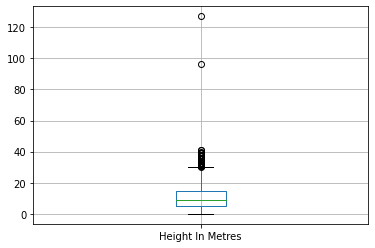

In [100]:
# Used a boxplot to find the outliers for the Height In Metres. 
# Where the crazy outliers can be seen below 100 and above 120.
trees.boxplot(column=['Height In Metres']) 

# All code below consists of the interquartile range (IQR) method for finding the outliers

In [101]:
# Firstly calculating the the quartiles (Q1 and Q3)
Q1 = trees['Height In Metres'].quantile(0.25)
Q3 = trees['Height In Metres'].quantile(0.75)

In [102]:
print(Q1, Q3)

5.0 15.0


In [103]:
# Caculated the IQR following the statistical emthod
IQR = Q3 - Q1
IQR

10.0

In [104]:
# Calculating the upper and lower limit named l_limit, u_limit
l_limit = Q1 - 1.5*IQR
u_limit = Q3 - 1.5*IQR

l_limit, u_limit

(-10.0, 0.0)

In [105]:
# Then used the outliers formula to find the outliers for the column and and then printed it 

In [106]:
outliers = trees[(trees['Height In Metres'] < Q1 - 1.5 * IQR) | (trees['Height In Metres'] > Q3 + 1.5 * IQR)]

In [107]:
outlier_column = outliers[['Height In Metres']]
outlier_column

,Height In Metres
547,38.0
830,34.0
920,38.0
1193,36.0
1213,31.0
...,...
22686,32.0
22701,33.0
22901,33.0
23007,35.0


In [108]:
# Then used IPython display to display the crazy outliers

In [109]:
from IPython.display import display

In [110]:
# I Identify the crazy outliers in the data set
crazy_outliers = trees['Height In Metres'][(np.abs(zscore(trees['Height In Metres'])) > 3) & (trees['Height In Metres'] < Q1 - 3 * IQR) | (trees['Height In Metres'] > Q3 + 3 * IQR)]

In [111]:
# Displaying the crazy outliers
display(crazy_outliers)

1356     96.0
1863    127.0
Name: Height In Metres, dtype: float64

# The same solution has been repeated for the Spread In Metres and Diameter In Centimetres At Breast Height columns

<hr/>

### 5.2 Outliers for Spread

Now this part will repeat the analysis for spread.

<AxesSubplot:>

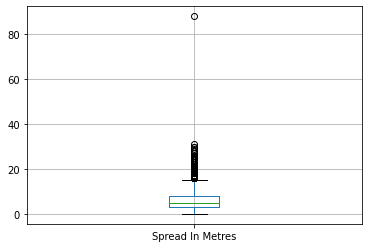

In [112]:
# Using a boxplot to find the outliers

trees.boxplot(column=['Spread In Metres'])

In [113]:
#Calculating the quartiles for this box plot (Q1 and Q3)
Q1 = trees['Spread In Metres'].quantile(0.25)
Q3 = trees['Spread In Metres'].quantile(0.75)

In [114]:
print(Q1, Q3)

3.0 8.0


In [115]:
# Using the formula to find the IQR.
IQR = Q3 - Q1
IQR

5.0

In [116]:
#Finding the upper and lower limit for this bo plot
l_limit = Q1 - 1.5*IQR
u_limit = Q3 - 1.5*IQR

l_limit, u_limit

(-4.5, 0.5)

Then this solution came to me because there was only crazy outlier and as result the mask method was used to filter and find any values above 80. 

In [117]:
mask = trees['Spread In Metres']>80
trees[mask]

,Identifier,Number Of Trees,Site Name,Contract Area,Scientific Name,Inspection Date,Inspection Due Date,Height In Metres,Spread In Metres,Diameter In Centimetres At Breast Height,Ward Code,Ward Name,Easting,Northing,Longitude,Latitude,Location
18567,00045515,1.0,Broadfield Estate 1,Housing,Quercus robur,2018-04-26,2021/2022,8.0,88.0,17.0,E05000144,Swiss Cottage,525993.0,184693.0,-0.184348,51.547074,"(51.547074, -0.184348)"


<hr/>

### 5.3 Outliers for Diameter
Now repeat the analysis for diameter.

<AxesSubplot:>

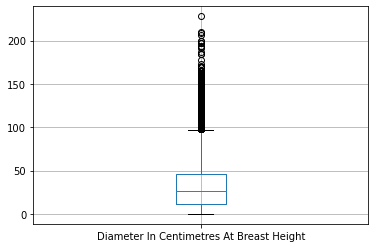

In [118]:
# Creating  boxplot to find the outliers
trees.boxplot(column=['Diameter In Centimetres At Breast Height']) 

In [119]:
# Finding the quartiles for this box plot

Q1 = trees['Diameter In Centimetres At Breast Height'].quantile(0.25)
Q3 = trees['Diameter In Centimetres At Breast Height'].quantile(0.75)
Q1, Q3

(12.0, 46.0)

In [120]:
# Finding the IQR
IQR = Q3 - Q1
IQR

34.0

In [121]:
# Finding the upper and lower limits
l_limit = Q1 - 1.5*IQR
u_limit = Q3 - 1.5*IQR

l_limit, u_limit

(-39.0, -5.0)

From here on, the same method for finding the crazy outlier was used as in the Height box plot; however, no crazy outliers were found. 

In [122]:
outliers = trees[(trees['Diameter In Centimetres At Breast Height'] < Q1 - 1.5 * IQR) | (trees['Diameter In Centimetres At Breast Height'] > Q3 + 1.5 * IQR)]

In [123]:
outlier_column = outliers[['Diameter In Centimetres At Breast Height']]
outlier_column

,Diameter In Centimetres At Breast Height
74,119.0
155,109.0
169,106.0
227,117.0
245,114.0
...,...
23130,101.0
23147,170.0
23183,110.0
23373,99.0


In [124]:
from IPython.display import display

In [125]:
# I Identify the crazy outliers in the data set
crazy_outliers = trees['Diameter In Centimetres At Breast Height'][(np.abs(zscore(trees['Diameter In Centimetres At Breast Height'])) > 3) & (trees['Diameter In Centimetres At Breast Height'] < Q1 - 3 * IQR) | (trees['Diameter In Centimetres At Breast Height'] > Q3 + 3 * IQR)]

In [126]:
# Selecting the outlier rows (if any)
# Displaying the crazy outliers
display(crazy_outliers)

347      163.0
547      161.0
817      160.0
1157     228.0
1213     170.0
         ...  
22248    157.0
22477    165.0
22684    153.0
22781    185.0
23147    170.0
Name: Diameter In Centimetres At Breast Height, Length: 62, dtype: float64

### 5.4 Observations

# The main objective in this task is to find the crazy outliers for Height, Spread and Diametre for the trees, through the use of the interquartile range (IQR) method. Then displaying the crazy outliers there were two outliers found in the Height in Metres column (96 , 127), one in the Spread in Metres column (88), and 0 in the Diameter In Centimetres At Breast Height column.

<hr/>

## Task 6: Identify Duplicates in the Trees Dataset

Sometimes data has duplicate entries.  This is another sign of data quality issues!

### 6.1 Find Duplicate Rows

In our dataset the `Identifier` column should be unique.  Find out if it is!  We've already used a function that can count how many times each value in a column exists.  Use is to see if we have duplicates in the trees' Dataframe.


Here  the duplicated values for the Identifier column have been found and counted them.
After that the sum of the duplicates has been found and then removed them with the .loc idea from this video https://openclassrooms.com/en/courses/1730411-use-python-libraries-for-data-science/5789155-apply-relational-algebra-operations-on-dataframes

In [127]:
trees.duplicated("Identifier")

0        False
1        False
2        False
3        False
4        False
         ...  
23439    False
23440    False
23441    False
23442    False
23443    False
Length: 23444, dtype: bool

In [128]:
trees.duplicated("Identifier").value_counts()

False    23438
True         6
dtype: int64

In [129]:
# I find out if we have any duplicates

trees.duplicated("Identifier").sum()

6

In [130]:
trees.duplicated(keep=False)

0        False
1        False
2        False
3        False
4        False
         ...  
23439    False
23440    False
23441    False
23442    False
23443    False
Length: 23444, dtype: bool

Now see if you can select the rows from trees DataFrame that are duplicates.  You will need to use the output from the cell above and use it to filter the trees dataframe.

In [131]:
# Selecting the rows that are duplicated for completeness.
duplicate_rows = trees[trees.duplicated(subset='Identifier',keep=False) >1 ]
print(duplicate_rows)

# The .loc idea came from this video https://openclassrooms.com/en/courses/1730411-use-python-libraries-for-data-science/5789155-apply-relational-algebra-operations-on-dataframes

Empty DataFrame
Columns: [Identifier, Number Of Trees, Site Name, Contract Area, Scientific Name, Inspection Date, Inspection Due Date, Height In Metres, Spread In Metres, Diameter In Centimetres At Breast Height, Ward Code, Ward Name, Easting, Northing, Longitude, Latitude, Location]
Index: []


In [132]:
trees.loc[trees.duplicated(keep=False)]

,Identifier,Number Of Trees,Site Name,Contract Area,Scientific Name,Inspection Date,Inspection Due Date,Height In Metres,Spread In Metres,Diameter In Centimetres At Breast Height,Ward Code,Ward Name,Easting,Northing,Longitude,Latitude,Location
4388,00032549,1.0,NARCISSUS ROAD,Highways,Betula albosinensis Fasc.,2018-09-19,2021/2022,9.0,6.0,19.0,E05000145,West Hampstead,525185.0,185127.0,-0.195840,51.551159,"(51.551159, -0.19584)"
5491,00000999,1.0,ALMA STREET,Highways,Sorbus hupehensis,2017-07-25,2020/2021,5.0,4.0,18.0,E05000139,Kentish Town,528834.0,184856.0,-0.143337,51.547904,"(51.547904, -0.143337)"
6111,00032549,1.0,NARCISSUS ROAD,Highways,Betula albosinensis Fasc.,2018-09-19,2021/2022,9.0,6.0,19.0,E05000145,West Hampstead,525185.0,185127.0,-0.195840,51.551159,"(51.551159, -0.19584)"
7027,00022744,1.0,YORK WAY,Highways,Ailanthus altissima,2019-10-30,2022/2023,7.5,3.0,18.0,E05000131,Cantelowes,529983.0,184724.0,-0.126837,51.546447,"(51.546447, -0.126837)"
9186,00022744,1.0,YORK WAY,Highways,Ailanthus altissima,2019-10-30,2022/2023,7.5,3.0,18.0,E05000131,Cantelowes,529983.0,184724.0,-0.126837,51.546447,"(51.546447, -0.126837)"
9482,00022674,1.0,WOODSOME ROAD,Highways,Sorbus,2017-10-07,2020/2021,7.0,6.0,28.0,E05000137,Highgate,528515.0,186109.0,-0.147481,51.559237,"(51.559237, -0.147481)"
13098,00000999,1.0,ALMA STREET,Highways,Sorbus hupehensis,2017-07-25,2020/2021,5.0,4.0,18.0,E05000139,Kentish Town,528834.0,184856.0,-0.143337,51.547904,"(51.547904, -0.143337)"
13628,00022674,1.0,WOODSOME ROAD,Highways,Sorbus,2017-10-07,2020/2021,7.0,6.0,28.0,E05000137,Highgate,528515.0,186109.0,-0.147481,51.559237,"(51.559237, -0.147481)"


Unfortunately the method above wasn't enough to find all duplicate values. So, the boolean mask from the previous step was used in order to find all duplicate values.

In [133]:
duplicate_rows = trees[trees.duplicated(subset='Identifier', keep=False)].reset_index(drop=True)


In [134]:
duplicate_rows

,Identifier,Number Of Trees,Site Name,Contract Area,Scientific Name,Inspection Date,Inspection Due Date,Height In Metres,Spread In Metres,Diameter In Centimetres At Breast Height,Ward Code,Ward Name,Easting,Northing,Longitude,Latitude,Location
0,00060088,1.0,FREDERICK STREET,Highways,Vacant Tree Pit (planned: Access),2019-11-09,2022/2023,NaN,NaN,NaN,E05000141,King's Cross,530770.0,182696.0,-0.116241,51.528046,"(51.528046, -0.116241)"
1,00032549,1.0,NARCISSUS ROAD,Highways,Betula albosinensis Fasc.,2018-09-19,2021/2022,9.0,6.0,19.0,E05000145,West Hampstead,525185.0,185127.0,-0.195840,51.551159,"(51.551159, -0.19584)"
2,00000999,1.0,ALMA STREET,Highways,Sorbus hupehensis,2017-07-25,2020/2021,5.0,4.0,18.0,E05000139,Kentish Town,528834.0,184856.0,-0.143337,51.547904,"(51.547904, -0.143337)"
3,00032549,1.0,NARCISSUS ROAD,Highways,Betula albosinensis Fasc.,2018-09-19,2021/2022,9.0,6.0,19.0,E05000145,West Hampstead,525185.0,185127.0,-0.195840,51.551159,"(51.551159, -0.19584)"
4,00022744,1.0,YORK WAY,Highways,Ailanthus altissima,2019-10-30,2022/2023,7.5,3.0,18.0,E05000131,Cantelowes,529983.0,184724.0,-0.126837,51.546447,"(51.546447, -0.126837)"
5,00022744,1.0,YORK WAY,Highways,Ailanthus altissima,2019-10-30,2022/2023,7.5,3.0,18.0,E05000131,Cantelowes,529983.0,184724.0,-0.126837,51.546447,"(51.546447, -0.126837)"
6,00022674,1.0,WOODSOME ROAD,Highways,Sorbus,2017-10-07,2020/2021,7.0,6.0,28.0,E05000137,Highgate,528515.0,186109.0,-0.147481,51.559237,"(51.559237, -0.147481)"
7,00060088,1.0,FREDERICK STREET,Highways,Vacant Tree Pit (planned: Acer campestre eco s...,2019-11-09,2022/2023,NaN,NaN,NaN,E05000141,King's Cross,530770.0,182696.0,-0.116241,51.528046,"(51.528046, -0.116241)"
8,00000999,1.0,ALMA STREET,Highways,Sorbus hupehensis,2017-07-25,2020/2021,5.0,4.0,18.0,E05000139,Kentish Town,528834.0,184856.0,-0.143337,51.547904,"(51.547904, -0.143337)"
9,00022674,1.0,WOODSOME ROAD,Highways,Sorbus,2017-10-07,2020/2021,7.0,6.0,28.0,E05000137,Highgate,528515.0,186109.0,-0.147481,51.559237,"(51.559237, -0.147481)"


### 6.4 Observations

# The main thing to observe here is that there are twelve duplicates (from 0 to 11) or six values in total in this task.

<hr/>

## Task 7: Identify Geolocation Issues

The geographic coordinates (Easting and Northing) can be used to plot the trees on a map.  We can use this approach to see if there are any unusual tree locations!


### 7.1 Remove Trees with Missing Geo-coordinates

Checking if there are any rows with null or 0 geo-coordinates.  If there are, remove them as we can't plot these.

In [135]:
# Made a copy of the trees
geotrees = trees.copy()

In [136]:
# Displaying the trees first few rows
geotrees

,Identifier,Number Of Trees,Site Name,Contract Area,Scientific Name,Inspection Date,Inspection Due Date,Height In Metres,Spread In Metres,Diameter In Centimetres At Breast Height,Ward Code,Ward Name,Easting,Northing,Longitude,Latitude,Location
0,00060053,1.0,Russell Nurseries Estate,Housing,Vacant Tree Pit,NaT,NaN,NaN,NaN,NaN,E05000135,Hampstead Town,527305.0,185240.0,-0.165240,51.551693,"(51.551693, -0.16524)"
1,00057855,1.0,BRECKNOCK JMI (E),Education,Vacant Tree Pit,2019-07-17,2022/2023,NaN,NaN,NaN,E05000131,Cantelowes,529923.0,184782.0,-0.127681,51.546984,"(51.546984, -0.127681)"
2,00059953,1.0,Estate 51 Ravenshaw Street,Housing,Ficus carica,NaT,NaN,5.0,4.0,10.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN
3,00059915,1.0,ROSARY RC JMI (E),Education,Betula jacquemontii,NaT,NaN,4.0,1.0,6.0,E05000135,Hampstead Town,527249.0,185261.0,-0.166051,51.551901,"(51.551901, -0.166051)"
4,00010762,1.0,Holly Lodge Estate,Housing,Ilex x altaclarensis,2017-06-14,2020/2021,14.0,6.0,26.0,E05000137,Highgate,528414.0,186770.0,-0.148704,51.565198,"(51.565198, -0.148704)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23439,00057455,1.0,"KILBURN GRANGE, MESSINA AVE (LS)",Parks,Sorbus aria,2017-03-28,2019/2020,2.0,1.0,6.0,E05000140,Kilburn,525130.0,184418.0,-0.196884,51.544796,"(51.544796, -0.196884)"
23440,00015494,1.0,OSSULSTON STREET,Highways,Sorbus aria 'Majestica',2019-10-28,2022/2023,12.0,6.0,48.0,E05000143,St Pancras and Somers Town,529758.0,183095.0,-0.130667,51.531863,"(51.531863, -0.130667)"
23441,00001693,1.0,BELMONT STREET,Highways,Platanus x hispanica,2017-07-31,2020/2021,18.0,10.0,57.0,E05000136,Haverstock,528302.0,184457.0,-0.151163,51.544432,"(51.544432, -0.151163)"
23442,00020342,1.0,Templar House Estate,Housing,Tilia europaea,2018-11-05,2021/2022,20.0,8.0,40.0,E05000132,Fortune Green,524615.0,184714.0,-0.204206,51.547573,"(51.547573, -0.204206)"


In [137]:

# Using the shape method to get more information about the data set
geotrees.shape

(23444, 17)

In [138]:
# Removed null Eastings through the .notna() method and created a new value called filtered_trees, and printed it for completeness.

filtered_trees = trees[trees['Easting'].notna()]
# Displaying the filtered data
print(filtered_trees)

      Identifier  Number Of Trees                         Site Name  \
0       00060053              1.0          Russell Nurseries Estate   
1       00057855              1.0                 BRECKNOCK JMI (E)   
2       00059953              1.0        Estate 51 Ravenshaw Street   
3       00059915              1.0                 ROSARY RC JMI (E)   
4       00010762              1.0                Holly Lodge Estate   
...          ...              ...                               ...   
23439   00057455              1.0  KILBURN GRANGE, MESSINA AVE (LS)   
23440   00015494              1.0                  OSSULSTON STREET   
23441   00001693              1.0                    BELMONT STREET   
23442   00020342              1.0              Templar House Estate   
23443   00013369              1.0                    LYNDHURST ROAD   

      Contract Area          Scientific Name Inspection Date  \
0           Housing          Vacant Tree Pit             NaT   
1         Education

In [139]:
# Removed 0 Eastings through the use of !=0 not equal operator  
filtered_trees = trees[trees['Easting'] != 0]
# Displaying the filtered data
print(filtered_trees)

      Identifier  Number Of Trees                         Site Name  \
0       00060053              1.0          Russell Nurseries Estate   
1       00057855              1.0                 BRECKNOCK JMI (E)   
3       00059915              1.0                 ROSARY RC JMI (E)   
4       00010762              1.0                Holly Lodge Estate   
5       00007523              1.0                Westcroft Estate 1   
...          ...              ...                               ...   
23439   00057455              1.0  KILBURN GRANGE, MESSINA AVE (LS)   
23440   00015494              1.0                  OSSULSTON STREET   
23441   00001693              1.0                    BELMONT STREET   
23442   00020342              1.0              Templar House Estate   
23443   00013369              1.0                    LYNDHURST ROAD   

      Contract Area          Scientific Name Inspection Date  \
0           Housing          Vacant Tree Pit             NaT   
1         Education

In [140]:
# The same was repeated the prcess for the Northings 

In [141]:
# Removed null Northings
filtered_trees = trees[trees['Northing'].notna()]
# Displaying the filtered data
print(filtered_trees)

      Identifier  Number Of Trees                         Site Name  \
0       00060053              1.0          Russell Nurseries Estate   
1       00057855              1.0                 BRECKNOCK JMI (E)   
2       00059953              1.0        Estate 51 Ravenshaw Street   
3       00059915              1.0                 ROSARY RC JMI (E)   
4       00010762              1.0                Holly Lodge Estate   
...          ...              ...                               ...   
23439   00057455              1.0  KILBURN GRANGE, MESSINA AVE (LS)   
23440   00015494              1.0                  OSSULSTON STREET   
23441   00001693              1.0                    BELMONT STREET   
23442   00020342              1.0              Templar House Estate   
23443   00013369              1.0                    LYNDHURST ROAD   

      Contract Area          Scientific Name Inspection Date  \
0           Housing          Vacant Tree Pit             NaT   
1         Education

In [142]:
# Removing 0 Northings.  
filtered_trees = trees[trees['Northing'] != 0]
# Displaying the filtered data
print(filtered_trees)

      Identifier  Number Of Trees                         Site Name  \
0       00060053              1.0          Russell Nurseries Estate   
1       00057855              1.0                 BRECKNOCK JMI (E)   
3       00059915              1.0                 ROSARY RC JMI (E)   
4       00010762              1.0                Holly Lodge Estate   
5       00007523              1.0                Westcroft Estate 1   
...          ...              ...                               ...   
23439   00057455              1.0  KILBURN GRANGE, MESSINA AVE (LS)   
23440   00015494              1.0                  OSSULSTON STREET   
23441   00001693              1.0                    BELMONT STREET   
23442   00020342              1.0              Templar House Estate   
23443   00013369              1.0                    LYNDHURST ROAD   

      Contract Area          Scientific Name Inspection Date  \
0           Housing          Vacant Tree Pit             NaT   
1         Education

In [143]:
# Confirming how many rows I have through the shape method

print(filtered_trees.shape[0])

23388


<hr/>

### 7.2 Plot Map of Trees

Now make the plot.  Do a scatter plot of Northing vs Easting. You should obtain an outline of the map of Camden. Compare that outline with a real map of Camden (use good old google maps!). You’ll be able to spot the trees that should not be in that dataset from there!

In [144]:
# Imported matplotlib.pyplot
import matplotlib.pyplot as plt

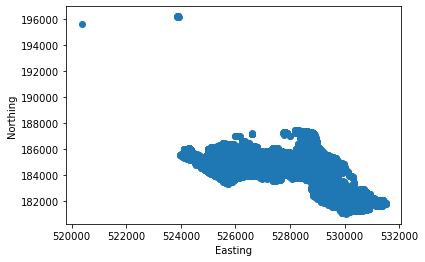

In [145]:
# Then plotted the trees on a map and created the scatter plot
plt.scatter(filtered_trees['Easting'], filtered_trees['Northing'])

# Added axis labels
plt.xlabel('Easting')
plt.ylabel('Northing')

# Showed the plot
plt.show()

### 7.3 Find Trees Outside Camden
From the scatter plot, you should be able to determine how to select the rows from the trees data set containing the offending trees (using the Easting and Northing values)

Select the rows containing trees outside of Camden.  Use the filter technique again.  

In [146]:
# Selecting the outlier rows through the use of a boolean mask indicating which rows contain trees outside of Camden
mask = (trees['Northing'] > 194000)

In [147]:
# Confirmed how many rows we have and used the mask to select the rows containing trees outside of Camden
print(mask)

0        False
1        False
2        False
3        False
4        False
         ...  
23439    False
23440    False
23441    False
23442    False
23443    False
Name: Northing, Length: 23444, dtype: bool


In [148]:
# Created new value and selected the outside trees.

outside_trees = trees[mask]
print(outside_trees)

      Identifier  Number Of Trees                  Site Name Contract Area  \
78      00044991              1.0          Bells Hill Estate       Housing   
298     00045000              1.0  Estate 167 Furzehill Road       Housing   
660     00044992              1.0          Bells Hill Estate       Housing   
1526    00044995              1.0          Bells Hill Estate       Housing   
5392    00044990              1.0          Bells Hill Estate       Housing   
18069   00044993              1.0          Bells Hill Estate       Housing   
18078   00044601              1.0          Bells Hill Estate       Housing   
19532   00044988              1.0          Bells Hill Estate       Housing   

              Scientific Name Inspection Date Inspection Due Date  \
78         Fraxinus excelsior      2017-04-28           2020/2021   
298          Pinus sylvestris      2017-04-28           2020/2021   
660        Crataegus monogyna      2017-04-28           2020/2021   
1526       Fraxinus e

### 7.4 Observations

# Main thing to notice here is that as a result of the scatter plot all outside trees appear to be with values greater than 194000. There are 8 in total. Therefore in task 7.3 they were assigned a variable in order to print them in  a data frame.

<hr/>

## Task 8: Identify Unmatched Data

### 8.1 Find Trees that Don't have Matching Environmental Data

In [149]:
# Finding the trees that don't have matching environmental data through the combination of the mask and isin methods

mask = ~trees['Identifier'].isin(trees_e['Identifier'])
unmatched_trees = trees[mask]
unmatched_trees

,Identifier,Number Of Trees,Site Name,Contract Area,Scientific Name,Inspection Date,Inspection Due Date,Height In Metres,Spread In Metres,Diameter In Centimetres At Breast Height,Ward Code,Ward Name,Easting,Northing,Longitude,Latitude,Location
66,00059712,1.0,Maiden Lane Estate,Housing,Acer saccharinum,2019-05-28,2022/2023,12.0,5.0,20.0,E05000131,Cantelowes,529795.0,184142.0,-0.129750,51.541266,"(51.541266, -0.12975)"
125,00048578,1.0,BUCK STREET,Highways,Sorbus aucuparia,2017-07-19,2020/2021,6.0,2.0,10.0,E05000130,Camden Town with Primrose Hill,528900.0,184020.0,-0.142698,51.540371,"(51.540371, -0.142698)"
1148,00006577,1.0,FAWLEY ROAD,Highways,Tilia euchlora,2018-09-28,2021/2022,15.0,6.0,38.0,E05000145,West Hampstead,525572.0,185015.0,-0.190313,51.550062,"(51.550062, -0.190313)"
1998,00007366,1.0,"FORTUNE GREEN RD, OPEN SPACE (LS)",Parks,Ilex aquifolium,2017-03-21,2019/2020,9.0,6.0,44.0,E05000132,Fortune Green,525074.0,185541.0,-0.197304,51.554901,"(51.554901, -0.197304)"
2246,00014633,1.0,Mortimer Estate,Housing,Tilia europaea,2019-01-29,2021/2022,16.0,12.0,47.0,E05000140,Kilburn,525763.0,183613.0,-0.188060,51.537424,"(51.537424, -0.18806)"
5478,00060382,1.0,SHAFTESBURY AVENUE,Highways,Vacant Tree Pit,NaT,NaN,NaN,NaN,NaN,E05000138,Holborn and Covent Garden,530073.0,181247.0,-0.126813,51.515186,"(51.515186, -0.126813)"
10637,00002874,1.0,BURGHLEY ROAD,Highways,Platanus x hispanica,2017-08-14,2020/2021,20.0,8.0,52.0,E05000139,Kentish Town,529119.0,185889.0,-0.138863,51.557120,"(51.55712, -0.138863)"
10977,00055227,1.0,BURGHLEY ROAD,Highways,Amelanchier lamarckii,2017-08-14,2020/2021,3.0,2.0,5.0,E05000139,Kentish Town,528920.0,185694.0,-0.141802,51.555408,"(51.555408, -0.141802)"
11795,00016702,1.0,"RED LION SQUARE, GARDENS (LS)",Parks,Platanus x hispanica,2018-06-04,2021/2022,30.0,23.0,165.0,E05000138,Holborn and Covent Garden,530572.0,181701.0,-0.119460,51.519146,"(51.519146, -0.11946)"
11856,00054744,1.0,Carrol & Sanderson Close Estate,Housing,Prunus unidentified species,2017-01-06,2020/2021,3.0,3.0,13.0,E05000137,Highgate,528661.0,185556.0,-0.145585,51.554226,"(51.554226, -0.145585)"


In [150]:
# confirming how many rows we have for clarity

num_rows = unmatched_trees.shape[0]
print(num_rows)

23


### 8.2 Find Environmental Data that Doesn't have Matching Tree Data

In [151]:
# Finding the environmental data that doesn't have matching tree data

mask = ~trees_e['Identifier'].isin(trees['Identifier'])
unmatched_environmental = trees_e[mask]
unmatched_environmental

,Identifier,Maturity,Physiological Condition,Tree Set To Be Removed,Removal Reason,Capital Asset Value For Amenity Trees,Carbon Storage In Kilograms,Gross Carbon Sequestration Per Year In Kilograms,Pollution Removal Per Year In Grams


In [152]:
# Confirming how many rows we have for clarity
new_rows_2 = unmatched_environmental.shape[0]
new_rows_2

0

### 8.3 Find Trees that Don't have Matching Common Names Data

In [153]:
# Finding the trees with scientific names that don't have matching common names data
mask = ~trees['Scientific Name'].isin(common_names['Scientific Name'])
unmatched_trees_2 = trees[mask]
unmatched_trees_2

,Identifier,Number Of Trees,Site Name,Contract Area,Scientific Name,Inspection Date,Inspection Due Date,Height In Metres,Spread In Metres,Diameter In Centimetres At Breast Height,Ward Code,Ward Name,Easting,Northing,Longitude,Latitude,Location
151,00051832,1.0,ARGYLE WALK,Highways,Sorbus aucuparia 'Streetwise',2019-02-10,2022/2023,7.0,3.0,12.0,E05000141,King's Cross,530227.0,182706.0,-0.124054,51.528257,"(51.528257, -0.124054)"
384,00053954,1.0,CHURCHILL ROAD,Highways,Sorbus aucuparia 'Streetwise',2017-10-07,2020/2021,3.0,2.0,5.0,E05000139,Kentish Town,529007.0,185975.0,-0.140440,51.557913,"(51.557913, -0.14044)"
495,00047497,1.0,PATSHULL PLACE,Highways,Sorbus aucuparia 'Streetwise',2017-06-22,2020/2021,5.0,3.0,11.0,E05000131,Cantelowes,529202.0,184717.0,-0.138094,51.546569,"(51.546569, -0.138094)"
611,00055434,1.0,SHARPLES HALL STREET,Highways,Sorbus aucuparia 'Streetwise',2019-09-30,2022/2023,2.0,2.0,4.0,E05000130,Camden Town with Primrose Hill,527962.0,184050.0,-0.156202,51.540853,"(51.540853, -0.156202)"
653,00055289,1.0,QUEEN'S CRESCENT,Highways,Sorbus aucuparia 'Streetwise',2017-07-08,2020/2021,4.0,1.0,7.0,E05000136,Haverstock,528072.0,184723.0,-0.154369,51.546881,"(51.546881, -0.154369)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21826,00050835,1.0,INGESTRE RD,Highways,Sorbus aucuparia 'Streetwise',2017-08-18,2020/2021,3.0,1.0,7.0,E05000139,Kentish Town,528962.0,185826.0,-0.141137,51.556589,"(51.556589, -0.141137)"
22948,00052341,1.0,NEW COMPTON STREET,Highways,Sorbus aucuparia 'Streetwise',2019-07-08,2022/2023,4.0,3.0,6.0,E05000138,Holborn and Covent Garden,529976.0,181160.0,-0.128249,51.514422,"(51.514422, -0.128249)"
23266,00048846,1.0,ASMARA ROAD,Highways,Sorbus aucuparia 'Streetwise',2018-08-28,2021/2022,5.0,3.0,8.0,E05000132,Fortune Green,524568.0,185347.0,-0.204661,51.553268,"(51.553268, -0.204661)"
23335,00048705,1.0,GOLDINGTON STREET,Highways,Sorbus aucuparia 'Streetwise',2019-10-23,2022/2023,6.0,2.0,12.0,E05000143,St Pancras and Somers Town,529662.0,183417.0,-0.131941,51.534780,"(51.53478, -0.131941)"


In [154]:
# Confirming how many rows we have for more clarity
num_rows_3 = unmatched_trees_2.shape[0]
print(num_rows_3)

76


<hr/>

### 8.4 Observations

# The findings in this task are 23 trees in the trees data set, 0 in the environmental and 76 in the common names set where they don't have matching environmental data and common names.

<hr/>

# END OF NOTEBOOK